# Linear and Logistic Regression

This week we look at our first predictive models based on regression.  

- Linear Regression
- Experimental Procedure
- Evaluation of Results
- Probability basics
- Logistic Regression

There are some useful notes here that I've taken some material from:
- [linear regression](https://github.com/justmarkham/DAT8/blob/master/notebooks/10_linear_regression.ipynb)
- [logistic regression](https://github.com/justmarkham/DAT8/blob/master/notebooks/12_logistic_regression.ipynb)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# supress some warnings that mess up my slides
import warnings; warnings.simplefilter('ignore')

## Predictive Modelling

- Can we predict the values for a target variable in unseen data? 
- What temperature will it be tomorrow?
- How tall will you be? 
- How much will you earn?
- Machine learning is about predicting unknowns
- Look at one of the simplest prediction methods: linear regression

## Predicting Birthweight

- Data on birthweight of babies via Sheffield University
- Details of mother and father: eg. height, weight, smoking status
- Details of baby: birthweight, length, head circumfrence
- Can we predict baby measures from parents

In [7]:
birth = pd.read_csv("birthweight_reduced.csv")
print(birth.shape)
birth.head() 

#Gestation (weeks)
#mnocig: Cigarettes (number smoked/day) for mother 
#fnocig: Cigarettes (number smoked/day), for father
#mppwt: Pre-pregnancy Weight (pounds)
#fedyrs: Father's education (years)
#bwt: Birth Weight (pounds)
#mage: Maternal Age (years)

(42, 17)


,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


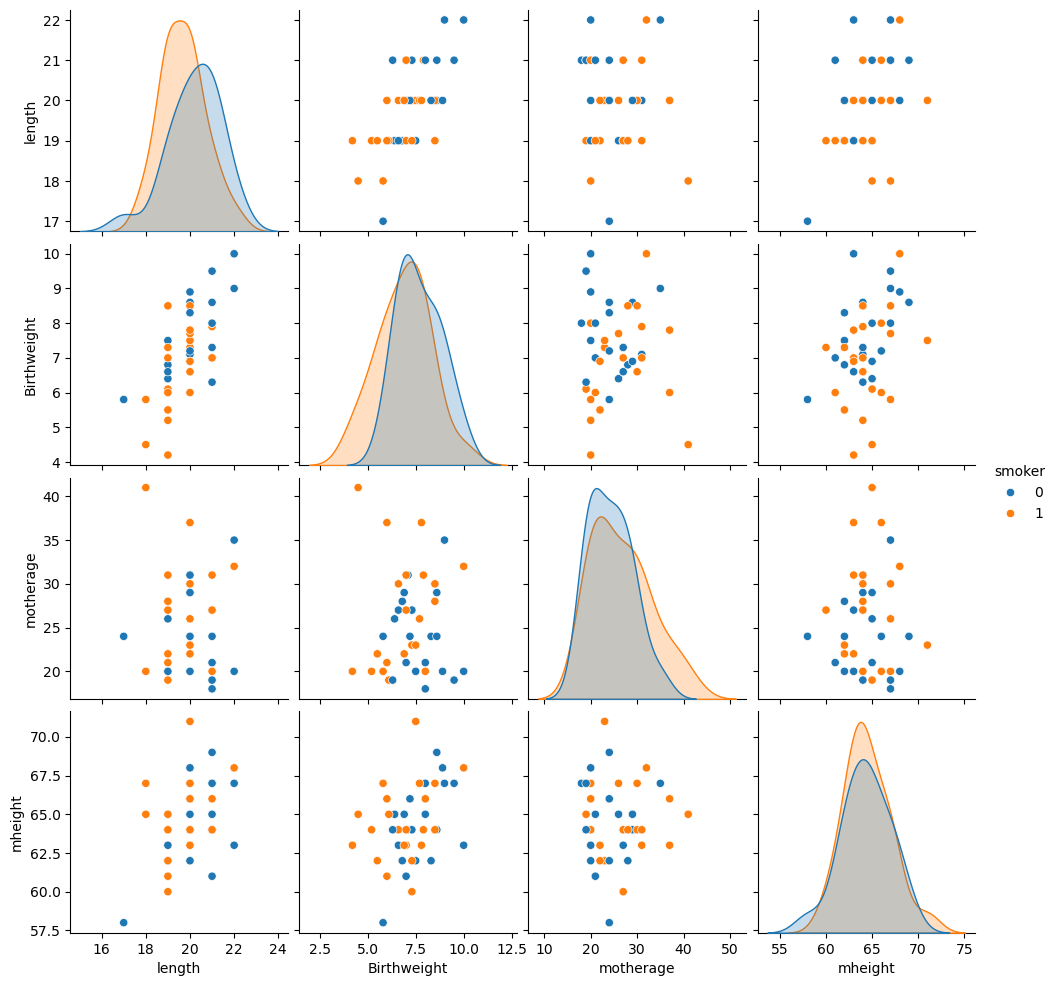

In [9]:
p = sns.pairplot(birth[['length', 'Birthweight', 'smoker', 'motherage', 'mheight']], hue='smoker')


Can we predict baby length from the height of the mother

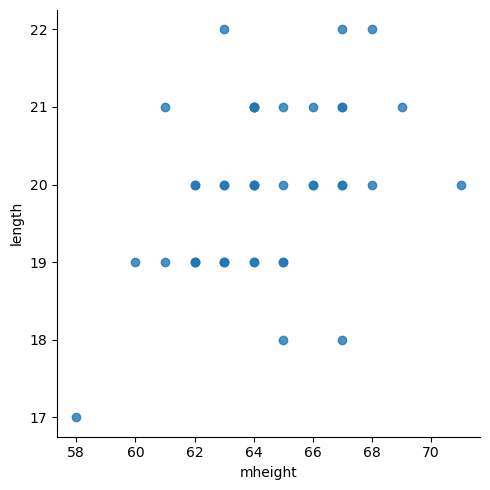

In [11]:
p = sns.lmplot(x='mheight', y='length', data=birth, height=5, fit_reg=False)
 #Plot data and regression model fits across a FacetGrid.

Look at the correlation between these variables.

In [15]:
birth[['mheight', 'length']].corr()

,mheight,length
mheight,1.000000,0.414731
length,0.414731,1.000000


## Linear Regression

- Model the relationship between these variables as a straight line
- Defined by the equation:  
> $y = O_1x + O_2$
- $O_1$ is the __gradient__ or slope of the line
- $O_2$ is the __intercept__ or where it crosses the y axis
- Choose values of $O_1$ and $O_2$ (the model coefficients) to minimise errors

## Least Squares

- Model predicts 
> $\hat{y} = O_1x + O_2$ 
- Real value of $y$ will usually be different
- Difference $\hat{y} - y$ is the _residual_ 
- Find the value that gives the minimum _sum of squared errors_ or residuals

<img src="http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/images/estimating_coefficients.png" width="90%">

[Source](http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/10_linear_regression.ipynb)

In [22]:
# create X and y
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
feature_cols = ['mheight']
X = birth[feature_cols]
y = birth['length'] 

# import, instantiate, fit
from sklearn.linear_model import LinearRegression 
model = LinearRegression() #Ordinary least squares Linear Regression. 
reg=model.fit(X, y) #Fit linear model.
reg.score(X, y) #Return the coefficient of determination of the prediction.
                #The best possible score is 1.0 and it can be negative

0.172002178977398

In [24]:
print("y = ", model.coef_, "* x + ", model.intercept_) 

y =  [0.18117563] * x +  8.25999821061108


## Model Interpretation

- Model predicts changes in birth length for different heights of the mother
- Intercept is 8.25 inches - what does this mean? 
- Coefficient of $x$ is 0.18
  - an increase of one inch in mother's height predicts an increase of 0.18 inches in baby length
  - a mother who is five inches taller will have a baby one inch longer

- [Regression coefficients](https://statisticsbyjim.com/glossary/regression-coefficient/#:~:text=In%20linear%20regression%2C%20coefficients%20are,and%20%2B5%20is%20the%20constant.)

## Prediction

We can use this formula to make predictions for the value of $y$ (`length`) given a value for $x$ (`mheight`).

Let's create a plot of the line overlaid with the original data.  

Get the max and min of the data, compute the predicted value of $y$ for each.

In [28]:
xmin = X.min()
ymin = model.coef_[0] * xmin + model.intercept_ #[0] means the value for the first feature
xmax = X.max()
ymax = model.coef_[0] * xmax + model.intercept_

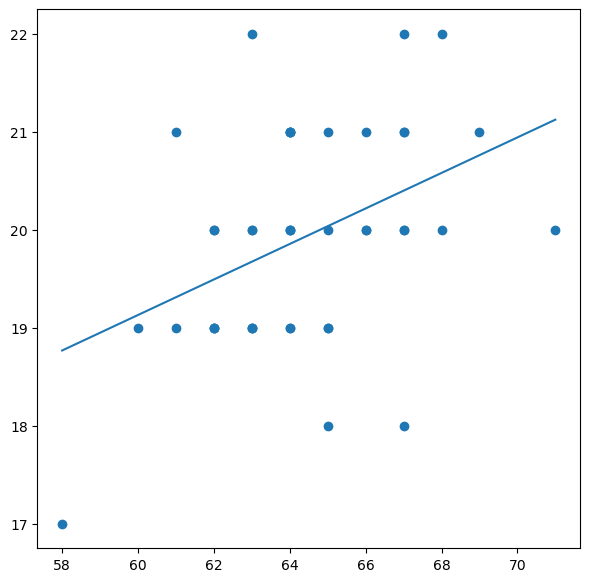

In [30]:
plt.figure(figsize=(7,7))
plt.plot([xmin, xmax], [ymin, ymax])  # single line
plt.scatter(X, y)  # original data 

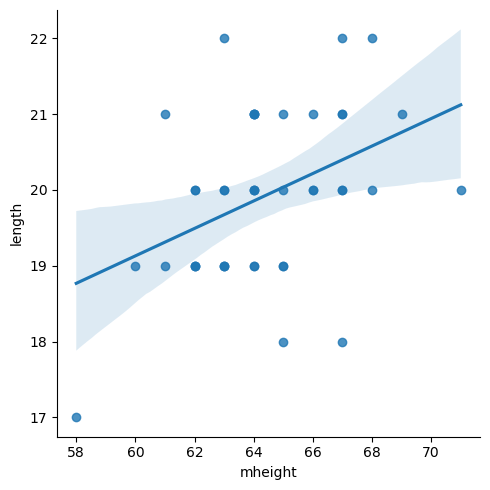

In [34]:
# Same thing with lmplot (linear model plot)
# shade area, https://stackoverflow.com/questions/61522386/sns-regplot-shows-a-shaded-area-for-the-regression-which-does-not-make-sense
p = sns.lmplot(x='mheight', y='length', data=birth, height=5)

We can use the predict method on the model to apply the formula:

In [36]:
print("Predicted value for x =", xmin[0], "is", model.predict([xmin]))
yhat = model.predict(X) #Predict using the linear model.
yhat

Predicted value for x = 58 is [18.76818466]


array([18.76818466, 19.67406281, 20.03641406, 20.03641406, 20.39876532,
       19.49288718, 19.85523844, 20.03641406, 19.49288718, 20.39876532,
       19.85523844, 19.85523844, 19.85523844, 19.67406281, 19.67406281,
       19.85523844, 19.49288718, 20.39876532, 19.49288718, 21.12346784,
       19.31171155, 19.49288718, 20.39876532, 20.03641406, 20.21758969,
       20.39876532, 19.85523844, 19.13053592, 20.21758969, 20.21758969,
       20.39876532, 19.31171155, 19.85523844, 19.67406281, 19.85523844,
       19.67406281, 20.57994095, 20.76111658, 20.03641406, 19.67406281,
       19.85523844, 20.57994095])

## How good is our model? 

- We can calculate the mean squared error for the original data
- How far on average is the original value of `length` from the predicted value?
$$mse = {1\over n} \sum (\hat{y} - y)^2$$
- Or take the square root to give us the same units as $y$ (inches)
- Gives us a measure of the goodness of fit of the model

In [39]:
mse = ((y - model.predict(X))**2).mean() #y = birth['length'] 
print(mse, np.sqrt(mse)) #mean squared error, 0 is the best

1.0012014468487584 1.0006005430983727


## R-squared Metric

- Another metric is $R^2$
- A measure of the variance of the data explained by the model
- For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values [0,1].
- The higher the value, the better the model?

$$R^2 = {Variance\ explained\ by\ the\ model \over Total\ variance}$$

<table>
 <tr>
  <td>
    <img src="https://i1.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/flp_highvar.png?w=375">
    $R^2 = 0.15$
  </td>
  <td>
    <img src="https://i2.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/flp_lowvar.png?w=376">
    $R^2 = 0.85$
  </td>
 </tr>
</table>

[source](http://statisticsbyjim.com/regression/interpret-r-squared-regression/)

`sklearn` provides convenient functions to calculate these metrics

In [43]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

MSE: 1.0012014468487584
R^2: 0.172002178977398


## Making our model better

- So far we've used one feature (mother height) 
- May be better to use more features
- We can still use a linear model - just need more coefficients as multipliers for features

$$y = o_{1_1}x_1 + o_{1_2}x_2 + O_2$$

- or, writing X as a vector quantity:

$$y = O_1X + O_2$$

In [46]:
# create X and y
feature_cols = ['mheight', 'motherage']
X = birth[feature_cols]
y = birth['length']
 
model = LinearRegression()
reg2=model.fit(X, y)
reg2.score(X, y) #The best possible score is 1.0 and it can be negative

0.1736154658378789

In [48]:
print("y = ", model.coef_, "* X + ", model.intercept_)

y =  [ 0.18199742 -0.00789783] * X +  8.408841562013922


In [50]:
predicted = model.predict(X)
print("MSE:", mean_squared_error(y, predicted)) #MSE: the best value is 0.0
print("R^2:", r2_score(y, predicted)) #R2: Best possible score is 1.0 and it can be negative
                                

MSE: 0.9992506867164423
R^2: 0.1736154658378789


## Model Interpretation

- Coefficient of mother's age is -0.0079 
- Very small multiplier on age 
- Even a large change in age has little effect on baby length
- Linear model assumes that these factors are independant effects
- Relatively easy to interpret the model in terms of the input variables

## Model Evaluation and Tuning 

- We can build a model and evaluate MSE or R^2 
- Add features and compare the scores
- But how well would it perform on new data? 
- Is the data we have trained on typical of all possible data? 
- Leads to a process of separating training and testing data 

## Train Test Split

- Use separate data partitions for training and testing the model
- Test data is an unseen sample from the population
- Gives a better idea of performance of the model on new data

In [55]:
feature_cols = ['mheight', 'motherage']
X = birth[feature_cols]
y = birth['length']

X_train = X[:30] #from start to 30 rows
print(X_train)
y_train = y[:30]
X_test = X[30:] #from 30 to the end of rows
print(X_test)
y_test = y[30:]

    mheight  motherage
0        58         24
1        63         20
2        65         26
3        65         41
4        67         20
5        62         28
6        64         20
7        65         19
8        62         20
9        67         18
10       64         29
11       64         31
12       64         30
13       63         31
14       63         27
15       64         19
16       62         23
17       67         30
18       62         22
19       71         23
20       61         21
21       62         24
22       67         19
23       65         29
24       66         24
25       67         26
26       64         31
27       60         27
28       66         20
29       66         37
    mheight  motherage
30       67         35
31       61         21
32       64         27
33       63         37
34       64         27
35       63         22
36       68         32
37       69         24
38       65         21
39       63         20
40       64         28
41       68

Now we train the model on the training partition and test on the test partition:

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted)) # if the model does not fit the trend (due to selecting biased samples), https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

MSE: 2.164965805890359
R^2: -1.6875437590363074


- Taking the first/last parts of the data might give biased samples
- Eg. if the data is ordered in some way
- Better to select random samples from the data
- `sklearn` provides a function `train_test_split` to do this

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20% for test
print(X_train.shape, X_test.shape)

(33, 2) (9, 2)


In [63]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 0.972376784196611
R^2: -0.09392388222118742


## Categorical Variables

- So far we've looked at _continous variables_ 
- Those with a real numerical value
- What about variables with _categorical values_? 
- Eg. in this data 
    - whether the mother or father are smokers
    - whether the baby has low birth weight
- Eg. nationality of a person, brand of product used


## Categorical Variables

- Convert categories to numerical values
- Binary variables can be coded as 0 or 1
- More values can use arbitrary integers if ordering is natural
    - Low/Mid/High becomes 0/1/2
- Unordered categories: convert to _dummy_ variables
    - Spring/Summer/Autumn/Winter
    - is_spring/is_summer/is_autumn/is_winter, each 0 or 1


In [67]:
birth[['mheight', 'smoker', 'length', 'Birthweight', 'LowBirthWeight', 'lowbwt']].head()

,mheight,smoker,length,Birthweight,LowBirthWeight,lowbwt
0,58,0,17,5.8,Low,1
1,63,1,19,4.2,Low,1
2,65,0,19,6.4,Normal,0
3,65,1,18,4.5,Low,1
4,67,1,18,5.8,Low,1


In [69]:
feature_cols = ['mheight', 'smoker']
X = birth[feature_cols]
y = birth['Birthweight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("y = ", model.coef_, "* X + ", model.intercept_)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

y =  [ 0.22609148 -0.91763687] * X +  -6.727823977823988
MSE: 1.4061240438423381
R^2: 0.11845164434032973


## Logistic Regression

- How do we predict categorical variables? 
- Look at a different dataset (iris)
- Can we predict species from some of the features? 
- Encode species as a dummy variable `is_setosa`

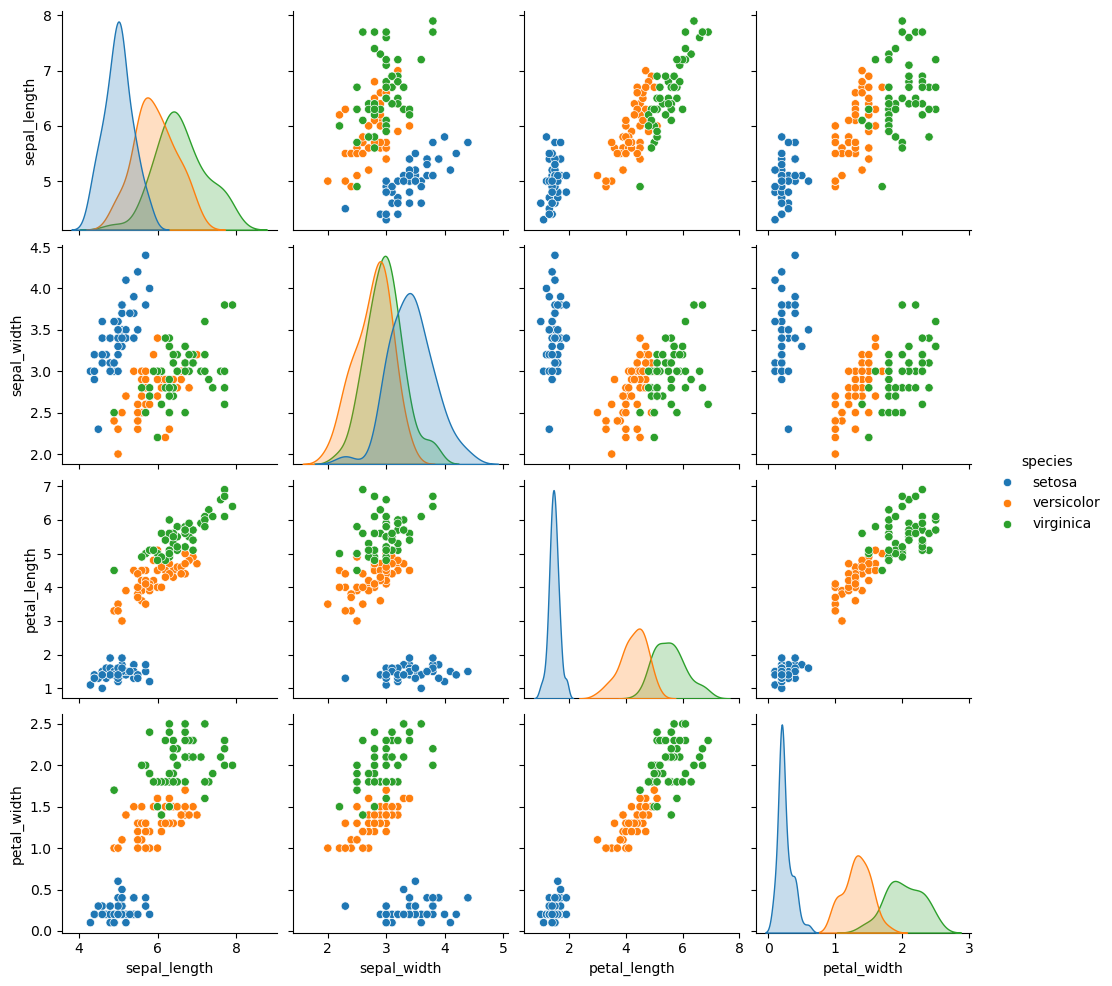

In [72]:
iris = sns.load_dataset('iris') #https://github.com/mwaskom/seaborn-data
sns.pairplot(iris, hue='species')

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: is_setosa, Length: 150, dtype: int64


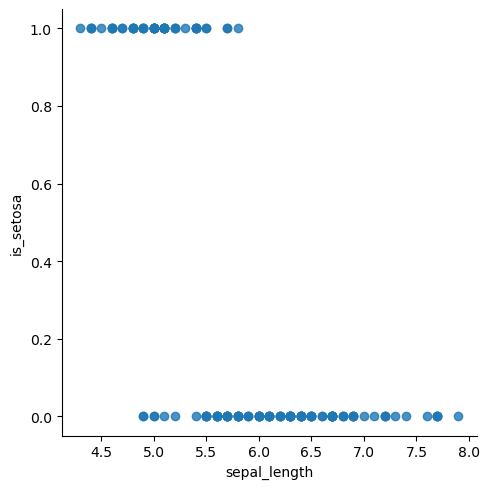

In [78]:
#Python astype() method enables us to set or convert the data type of an existing data column in a dataset or a data frame.
# another way: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
iris['is_setosa'] = (iris['species'] == 'setosa').astype('int64')
iris['is_versicolor'] = (iris['species'] == 'versicolor').astype('int64')
iris['is_virginica'] = (iris['species'] == 'virginica').astype('int64')
print(iris['is_setosa'])
iris.sort_values('sepal_length')
sns.lmplot(x='sepal_length', y='is_setosa', data=iris, fit_reg=False)

In [80]:
# Fit a linear model
feature_cols = ['sepal_length']
X = iris[feature_cols]
y = iris['is_setosa'] 
model = LinearRegression()
model.fit(X, y)
print("y = ", model.coef_, "* X + ", model.intercept_)


y =  [-0.40978124] * X +  2.7278217321087754


## Model Predictions

- Model will predict a continuous value for `is_setosa`
- We can only interpret this as a category 1 if it is Setosa

Text(0, 0.5, 'predicted is_setosa')

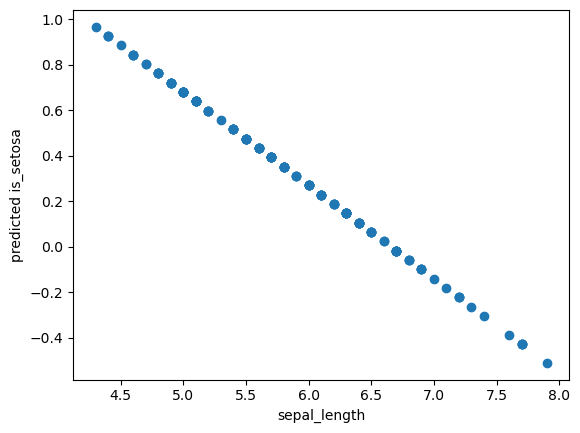

In [82]:
predicted = model.predict(X)
plt.scatter(X, predicted)
plt.xlabel('sepal_length')
plt.ylabel('predicted is_setosa')

Apply a threshold:

- greater than 0.5 is setosa
- less than 0.5 isn't

What we've done here can be achieved with __Logistic Regression__.

In [86]:
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

feature_cols = ['sepal_length']
X = iris[feature_cols]
y = iris['is_setosa']
logreg = LogisticRegression(C=1e9) #Inverse of regularization strength
                                 #https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul
reg3=logreg.fit(X, y)
reg3.score(X,y) #Return the mean accuracy on the given test data and labels

0.8933333333333333

## Predicting Probabilities

- But here's the extra trick that Logistic Regression gives us. 

- We can predict the probability of each outcome based on the input variables.

- Given the evidence (inputs) how likely is this category?

Text(0, 0.5, 'is_setosa')

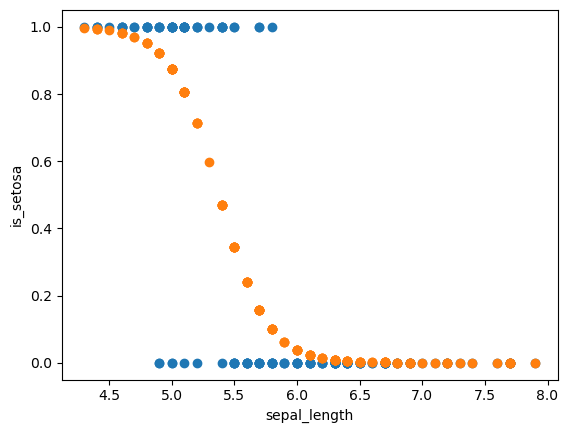

In [28]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
probs = logreg.predict_proba(X) [:, 1] #Probability estimates, the returned estimates for all classes are ordered by the label of classes.
#Returns array-like of shape (n_samples, n_classes)
plt.scatter(X, y); plt.scatter(X, probs)
plt.xlabel('sepal_length');plt.ylabel('is_setosa')
#None

## Probability and Odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

[source](https://github.com/justmarkham/DAT8/blob/master/notebooks/10_linear_regression.ipynb) for this and some of the next slides.

## Probability and Odds
$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

[Here's another page](https://stats.seandolinar.com/statistics-probability-vs-odds/) that explains odds and probability.

In [29]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [30]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


## Logistic Regression

**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = O_1x + O_2$$

**Logistic regression:** log-odds of a categorical response being "true (1)" is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = O_1x + O_2$$

This is called the **logit function**.


## Logistic Regression

- Models a categorical response: true (1) or false (0)
- Model is fitted in the same way as linear regression
    - computed based on the distribution of data
- Model coefficients predict the __log odds__ of a category given input variables
- Can convert these to a prediction of the category (most likely response)
- Can convert to a measure of probability

## Feature Selection

* When we build a model we need to select which features to use
* Could just add all features we have
    * Can be harmful
    * More features means more complex model (more parameters to estimate)
    * Need more data to get good estimates
    * [The Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
* So, prefer to select the most useful features
* Remove features that don't help


## Recursive Feature Elimination

* To find the best features, eliminate the least useful features one by one
* [RFE](https://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements this in sklearn
* Train a model on all features
* Choose the least important feature, eliminate it (eg. look at coeffs)
* Repeat training on samller set of features
* Until we have the target number of features


In [89]:
# Set up an experiment with the birth data
feature_cols = np.array(['smoker', 'motherage', 'mheight', 'Gestation', 'fheight', 'mppwt', 'fage', 'fedyrs', 'fnocig'])
X = birth[feature_cols]
y = birth['Birthweight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [91]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=6)  # select 6 features for us
selector = selector.fit(X, y)

supp = selector.get_support() #https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel.get_support
#Get a mask, or integer index, of the features selected.
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)
# test the model
predicted = selector.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

Selected features: ['smoker' 'motherage' 'mheight' 'Gestation' 'fheight' 'fage']
Coeffs: [-0.7144526  -0.06468526  0.16083654  0.28982024 -0.03982595  0.07119567]
MSE: 0.5751822401544364
R^2: 0.6667745630712758


## Regression Models

- Fit a linear model to a set of data to predict an outcome
- Linear Regression for continuous variables
- Logistic Regression for categorical variables
- Model coefficients are obtained analytically (via a formula)
- Model is highly interpretable
- Can perform well with a small number of observations
- Can use multiple input variables
- Assumes a linear relationship
- Assumes features are independant